In [1]:
#import
import numpy as np
import pandas as pd
import seaborn
import codecs
import jieba
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,roc_curve,auc,precision_recall_curve
from sklearn.metrics import classification_report,f1_score

In [2]:
data = pd.read_csv('/Users/mac/Desktop/2022春课件/时序/商品清单（new）.csv')
data.head()

,商品名称,一级分类,二级分类,三级分类
0,**N蓝妹啤酒易拉罐3,酒类,啤酒,啤酒
1,农夫水溶C100青皮桔445ml,饮料,果蔬汁,果蔬饮料
2,N七匹狼（软灰）,烟类,香烟,软盒香烟
3,N七匹狼（软红）,烟类,香烟,软盒香烟
4,农夫山泉水550ml,饮料,水,矿泉水


In [3]:
#标签映射为整数
listType = data['一级分类'].unique()
com_map = dict.fromkeys(listType)
for i in range(len(listType)):
    com_map[listType[i]] = i
data['一级分类_整数'] = data['一级分类'].map(com_map)

listType = data['二级分类'].unique()
com_map = dict.fromkeys(listType)
for i in range(len(listType)):
    com_map[listType[i]] = i
data['二级分类_整数'] = data['二级分类'].map(com_map)

listType = data['三级分类'].unique()
com_map = dict.fromkeys(listType)
for i in range(len(listType)):
    com_map[listType[i]] = i
data['三级分类_整数'] = data['三级分类'].map(com_map)

data.head()

,商品名称,一级分类,二级分类,三级分类,一级分类_整数,二级分类_整数,三级分类_整数
0,**N蓝妹啤酒易拉罐3,酒类,啤酒,啤酒,0,0,0
1,农夫水溶C100青皮桔445ml,饮料,果蔬汁,果蔬饮料,1,1,1
2,N七匹狼（软灰）,烟类,香烟,软盒香烟,2,2,2
3,N七匹狼（软红）,烟类,香烟,软盒香烟,2,2,2
4,农夫山泉水550ml,饮料,水,矿泉水,1,3,3


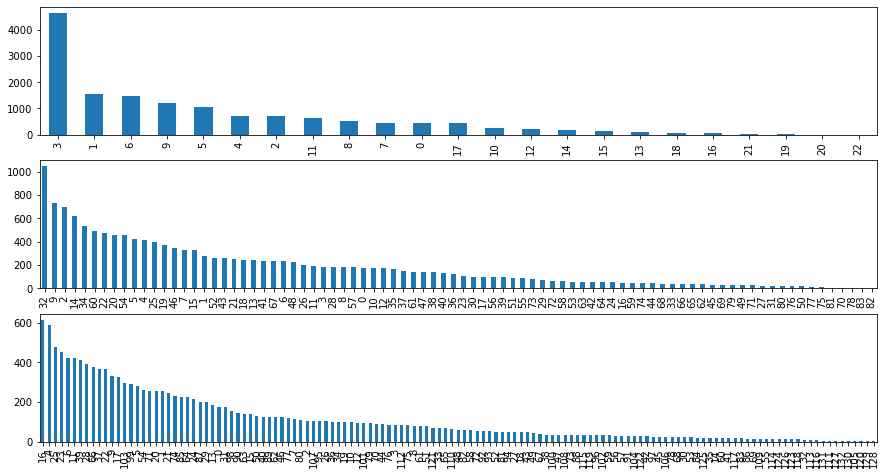

In [4]:
#观察样本比例
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(15,8))
data['一级分类_整数'].value_counts().plot.bar(ax=axes[0])
data['二级分类_整数'].value_counts().plot.bar(ax=axes[1])
data['三级分类_整数'].value_counts().plot.bar(ax=axes[2])
plt.show()

## 存在比较严重的比例失衡问题

## 目前想到可以采用不同做法的地方：
#### 1、样本失衡的处理方法
#### 2、不同的词向量化方法
#### 3、训练集与测试集的划分（如果解决了样本失衡可不考虑）
#### 4、三级分类用三个模型还是一个模型
#### 5、不同的模型


## 可能存在的问题：
#### 1、模型是否存在依赖品牌名称的现象，如果是，是好还是坏

In [5]:
first_f1_score_h = []
first_acc_h = []

second_f1_score_h = []
second_acc_h = []

third_f1_score_h = []
third_acc_h = []

## 模型1：采用词袋向量/不对原数据的失衡比例做处理/随机划分训练集与测试集/高斯朴素贝叶斯分别对三类标签拟合

In [6]:
#词袋向量
stopkey = [w.strip() for w in codecs.open('/Users/mac/未命名文件夹/呆萌的停用词表.txt', 'r').readlines()]
names = ""
for name in data['商品名称']:
    names += (name + "\n")
corpus = {}
for i, com in enumerate(names.split('\n')):
    dict1 = {}
    for tok in jieba.lcut(com):
        if tok not in stopkey:
            dict1[tok] = 1
    corpus[i] = dict1
df = pd.DataFrame.from_records(corpus).fillna(0).astype(int).T
df = df.loc[:df.shape[0]-2]
df.head()

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/_t/zp2z4_4x4gg78j4gh86h6z5m0000gn/T/jieba.cache
Loading model cost 0.881 seconds.
Prefix dict has been built successfully.


,N,蓝妹,啤酒,易拉罐,农夫,水溶,C100,青皮,桔,445ml,...,绿野,恬静,鲻,卧云东,紫衫,擅梅菜,紫仙,派香,派原,祖名素
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#一级标签效果
X = df
Y = data['一级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB1=GaussianNB()
modelNB1.fit(X_train,Y_train)
Y_pre = modelNB1.predict(X_test)
print(classification_report(Y_test, Y_pre))
first_acc_h.append(accuracy_score(Y_test, Y_pre))
first_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       133
           1       0.90      0.90      0.90       464
           2       0.97      0.92      0.94       196
           3       0.94      0.89      0.91      1364
           4       0.78      0.94      0.85       219
           5       0.91      0.93      0.92       338
           6       0.80      0.89      0.84       449
           7       0.83      0.82      0.83       118
           8       0.91      0.88      0.90       161
           9       0.94      0.83      0.88       381
          10       0.58      0.71      0.64        77
          11       0.85      0.56      0.67       217
          12       0.66      0.93      0.77        57
          13       0.92      0.94      0.93        35
          14       0.59      0.78      0.67        54
          15       0.79      0.86      0.83        44
          16       0.33      0.30      0.32        10
          17       0.95    

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
#二级标签效果
Y = data['二级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB2=GaussianNB()
modelNB2.fit(X_train,Y_train)
Y_pre = modelNB2.predict(X_test)
print(classification_report(Y_test, Y_pre))
second_acc_h.append(accuracy_score(Y_test, Y_pre))
second_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.77      0.80      0.78        79
           2       0.97      0.85      0.91       184
           3       0.90      0.90      0.90        51
           4       0.82      0.74      0.78       125
           5       0.81      0.74      0.77       133
           6       0.72      0.85      0.78        66
           7       0.77      0.81      0.79       106
           8       0.84      0.94      0.89        51
           9       0.89      0.82      0.85       218
          10       0.79      0.86      0.82        56
          11       0.68      0.84      0.75        51
          12       0.94      0.78      0.85        58
          13       0.58      0.52      0.55        61
          14       0.84      0.84      0.84       176
          15       0.76      0.83      0.79       111
          16       0.75      1.00      0.86        12
          17       0.96    

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
#三级标签效果
Y = data['三级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB3=GaussianNB()
modelNB3.fit(X_train,Y_train)
Y_pre = modelNB3.predict(X_test)
print(classification_report(Y_test, Y_pre))
third_acc_h.append(accuracy_score(Y_test, Y_pre))
third_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.73      0.73      0.73        74
           2       0.40      0.71      0.51        24
           3       1.00      0.70      0.82        23
           4       0.93      0.72      0.81       160
           5       0.67      0.74      0.70        84
           6       0.80      0.73      0.76       133
           7       0.66      0.68      0.67        31
           8       0.29      0.33      0.31        24
           9       0.80      0.81      0.81       106
          10       0.90      0.88      0.89        32
          11       0.84      0.74      0.78       126
          12       0.71      0.88      0.79        34
          13       0.71      0.82      0.76        51
          14       0.75      0.75      0.75         4
          15       0.61      0.63      0.62        35
          16       0.88      0.82      0.85       176
          17       0.78    

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packa

## 模型2：采用词袋向量/不对原数据的失衡比例做处理/随机划分训练集与测试集/随机森林分别对三类标签拟合

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


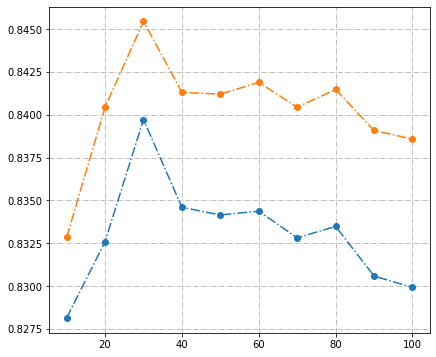

In [10]:
from sklearn import ensemble
#一级标签
Y = data['一级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
search = range(10,101,10)
testAcc = []
testF1 = []
for b in search:
    modelRF1 = ensemble.RandomForestClassifier(n_estimators=b,oob_score=True,random_state=123)
    modelRF1.fit(X_train,Y_train)
    Y_pre = modelRF1.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_pre))
    testF1.append(f1_score(Y_test, Y_pre, average='weighted'))
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.grid(True, linestyle = '-.')
ax1.plot(search, testAcc, label="testAcc", marker='o', linestyle = '-.')
ax1.plot(search, testF1, label="testF1", marker='o', linestyle = '-.')

In [11]:
first_acc_h.append(max(testAcc))
first_f1_score_h.append(testF1[testAcc.index(max(testAcc))])

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


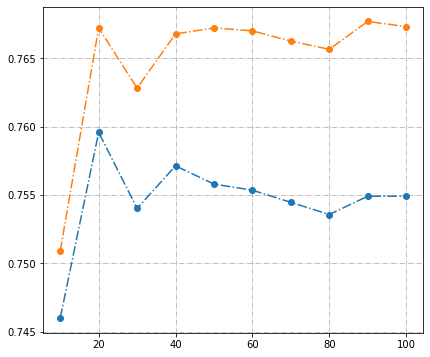

In [12]:
#二级标签
Y = data['二级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
search = range(10,101,10)
testAcc = []
testF1 = []
for b in search:
    modelRF2 = ensemble.RandomForestClassifier(n_estimators=b,oob_score=True,random_state=123)
    modelRF2.fit(X_train,Y_train)
    Y_pre = modelRF2.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_pre))
    testF1.append(f1_score(Y_test, Y_pre, average='weighted'))
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.grid(True, linestyle = '-.')
ax1.plot(search, testAcc, label="testAcc", marker='o', linestyle = '-.')
ax1.plot(search, testF1, label="testF1", marker='o', linestyle = '-.')

In [13]:
second_acc_h.append(max(testAcc))
second_f1_score_h.append(testF1[testAcc.index(max(testAcc))])

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


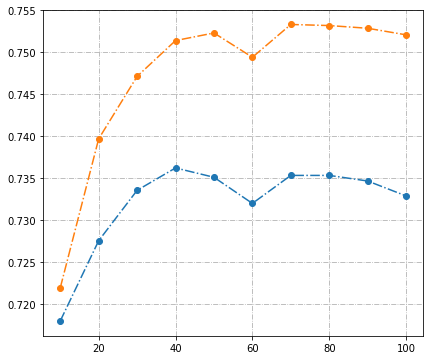

In [14]:
#三级标签
Y = data['三级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
search = range(10,101,10)
testAcc = []
testF1 = []
for b in search:
    modelRF3 = ensemble.RandomForestClassifier(n_estimators=b,oob_score=True,random_state=123)
    modelRF3.fit(X_train,Y_train)
    Y_pre = modelRF3.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_pre))
    testF1.append(f1_score(Y_test, Y_pre, average='weighted'))
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.grid(True, linestyle = '-.')
ax1.plot(search, testAcc, label="testAcc", marker='o', linestyle = '-.')
ax1.plot(search, testF1, label="testF1", marker='o', linestyle = '-.')

In [15]:
third_acc_h.append(max(testAcc))
third_f1_score_h.append(testF1[testAcc.index(max(testAcc))])

## 模型3：采用词袋向量/不对原数据的失衡比例做处理/随机划分训练集与测试集/支持向量机分别对三类标签拟合

In [16]:
from sklearn import svm
#一级标签
Y = data['一级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelSVC1 = svm.SVC(kernel='rbf', random_state = 123)
modelSVC1.fit(X_train,Y_train)
Y_pre = modelSVC1.predict(X_test)
print(classification_report(Y_test, Y_pre))
first_acc_h.append(accuracy_score(Y_test, Y_pre))
first_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       133
           1       0.92      0.91      0.91       464
           2       0.68      0.95      0.79       196
           3       0.76      0.98      0.85      1364
           4       0.94      0.84      0.89       219
           5       0.93      0.86      0.90       338
           6       0.91      0.81      0.86       449
           7       0.97      0.58      0.72       118
           8       0.98      0.74      0.84       161
           9       0.91      0.81      0.86       381
          10       0.93      0.36      0.52        77
          11       0.74      0.71      0.72       217
          12       0.81      0.60      0.69        57
          13       1.00      0.69      0.81        35
          14       0.79      0.43      0.55        54
          15       1.00      0.43      0.60        44
          16       0.00      0.00      0.00        10
          17       0.99    

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#二级标签
Y = data['二级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelSVC2 = svm.SVC(kernel='rbf', random_state = 123)
modelSVC2.fit(X_train,Y_train)
Y_pre = modelSVC2.predict(X_test)
print(classification_report(Y_test, Y_pre))
second_acc_h.append(accuracy_score(Y_test, Y_pre))
second_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        55
           1       0.76      0.82      0.79        79
           2       0.49      0.96      0.65       184
           3       1.00      0.84      0.91        51
           4       0.85      0.90      0.88       125
           5       0.78      0.75      0.76       133
           6       0.95      0.86      0.90        66
           7       0.84      0.89      0.86       106
           8       0.88      0.86      0.87        51
           9       0.54      0.93      0.68       218
          10       0.94      0.84      0.89        56
          11       0.90      0.75      0.82        51
          12       0.95      0.71      0.81        58
          13       0.67      0.69      0.68        61
          14       0.81      0.91      0.86       176
          15       0.96      0.69      0.81       111
          16       1.00      1.00      1.00        12
          17       0.92    

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#三级标签
Y = data['三级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelSVC3 = svm.SVC(kernel='rbf', random_state = 123)
modelSVC3.fit(X_train,Y_train)
Y_pre = modelSVC3.predict(X_test)
print(classification_report(Y_test, Y_pre))
third_acc_h.append(accuracy_score(Y_test, Y_pre))
third_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        55
           1       0.70      0.85      0.77        74
           2       0.95      0.75      0.84        24
           3       1.00      0.74      0.85        23
           4       0.46      0.96      0.62       160
           5       0.85      0.85      0.85        84
           6       0.64      0.80      0.71       133
           7       0.81      0.84      0.83        31
           8       0.91      0.42      0.57        24
           9       0.83      0.90      0.86       106
          10       0.93      0.78      0.85        32
          11       0.52      0.82      0.64       126
          12       0.92      0.68      0.78        34
          13       0.90      0.75      0.82        51
          14       0.75      0.75      0.75         4
          15       0.77      0.57      0.66        35
          16       0.80      0.91      0.85       176
          17       0.96    

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packa

## 模型4：采用tf-idf/不对原数据的失衡比例做处理/随机划分训练集与测试集/高斯朴素贝叶斯分别对三类标签拟合

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
TextSet = []
for name in data['商品名称']:
    TextSet.append(name)
WordSet = [" ".join(jieba.cut(item)) for item in TextSet]

def cleanText(alltext):
    textNew=[]
    for sig_list in alltext:
        tmp = [''.join(words) for words in sig_list.split(' ') if (words not in stopkey)]
        textNew.append(' '.join(tmp))
    return(textNew)

WordSetN=cleanText(WordSet)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(WordSetN)
words = vectorizer.get_feature_names()
df2 = pd.DataFrame(X.toarray(),columns=words)
X = df2

In [28]:
#一级标签
Y = data['一级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB1=GaussianNB()
modelNB1.fit(X_train,Y_train)
Y_pre = modelNB1.predict(X_test)
print(classification_report(Y_test, Y_pre))
first_acc_h.append(accuracy_score(Y_test, Y_pre))
first_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       133
           1       0.88      0.87      0.88       464
           2       0.96      0.88      0.92       196
           3       0.92      0.86      0.89      1364
           4       0.75      0.89      0.82       219
           5       0.90      0.93      0.91       338
           6       0.76      0.81      0.78       449
           7       0.84      0.82      0.83       118
           8       0.93      0.85      0.89       161
           9       0.91      0.82      0.86       381
          10       0.53      0.66      0.59        77
          11       0.79      0.46      0.58       217
          12       0.70      0.89      0.78        57
          13       0.89      0.97      0.93        35
          14       0.46      0.70      0.55        54
          15       0.68      0.86      0.76        44
          16       0.57      0.40      0.47        10
          17       0.91    

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#二级标签
Y = data['二级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB2=GaussianNB()
modelNB2.fit(X_train,Y_train)
Y_pre = modelNB2.predict(X_test)
print(classification_report(Y_test, Y_pre))
second_acc_h.append(accuracy_score(Y_test, Y_pre))
second_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        55
           1       0.74      0.81      0.78        79
           2       0.97      0.79      0.87       184
           3       0.90      0.92      0.91        51
           4       0.81      0.71      0.76       125
           5       0.80      0.68      0.73       133
           6       0.76      0.80      0.78        66
           7       0.82      0.80      0.81       106
           8       0.81      0.94      0.87        51
           9       0.86      0.83      0.84       218
          10       0.86      0.88      0.87        56
          11       0.68      0.82      0.74        51
          12       0.94      0.81      0.87        58
          13       0.55      0.51      0.53        61
          14       0.81      0.78      0.79       176
          15       0.80      0.82      0.81       111
          16       0.92      1.00      0.96        12
          17       0.96    

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packa

In [30]:
#三级标签
Y = data['三级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB3=GaussianNB()
modelNB3.fit(X_train,Y_train)
Y_pre = modelNB3.predict(X_test)
print(classification_report(Y_test, Y_pre))
third_acc_h.append(accuracy_score(Y_test, Y_pre))
third_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        55
           1       0.71      0.74      0.73        74
           2       0.25      0.58      0.35        24
           3       0.88      0.65      0.75        23
           4       0.91      0.60      0.72       160
           5       0.67      0.70      0.69        84
           6       0.81      0.68      0.74       133
           7       0.68      0.61      0.64        31
           8       0.30      0.33      0.31        24
           9       0.83      0.80      0.82       106
          10       0.90      0.88      0.89        32
          11       0.78      0.72      0.75       126
          12       0.76      0.74      0.75        34
          13       0.69      0.82      0.75        51
          14       0.50      0.50      0.50         4
          15       0.55      0.63      0.59        35
          16       0.83      0.78      0.80       176
          17       0.82    

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packa

## 模型5：采用tf-idf/不对原数据的失衡比例做处理/随机划分训练集与测试集/随机森林分别对三类标签拟合

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


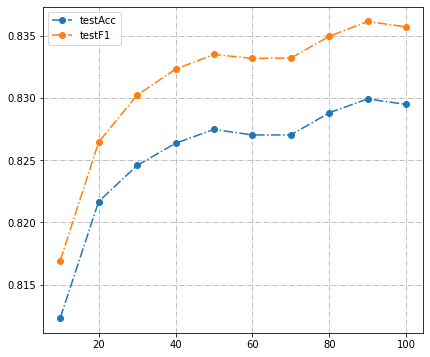

In [31]:
from sklearn import ensemble
#一级标签
Y = data['一级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
search = range(10,101,10)
testAcc = []
testF1 = []
for b in search:
    modelRF1 = ensemble.RandomForestClassifier(n_estimators=b,oob_score=True,random_state=123)
    modelRF1.fit(X_train,Y_train)
    Y_pre = modelRF1.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_pre))
    testF1.append(f1_score(Y_test, Y_pre, average='weighted'))
first_acc_h.append(max(testAcc))
first_f1_score_h.append(testF1[testAcc.index(max(testAcc))])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.grid(True, linestyle = '-.')
ax1.plot(search, testAcc, label="testAcc", marker='o', linestyle = '-.')
ax1.plot(search, testF1, label="testF1", marker='o', linestyle = '-.')
ax1.legend()

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


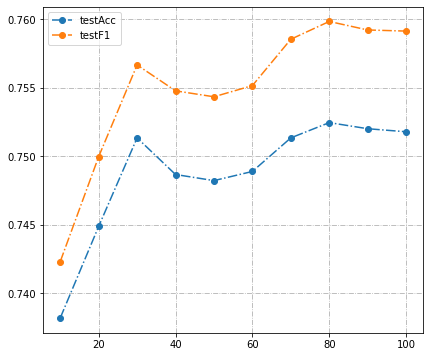

In [32]:
#二级标签
Y = data['二级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
search = range(10,101,10)
testAcc = []
testF1 = []
for b in search:
    modelRF2 = ensemble.RandomForestClassifier(n_estimators=b,oob_score=True,random_state=123)
    modelRF2.fit(X_train,Y_train)
    Y_pre = modelRF2.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_pre))
    testF1.append(f1_score(Y_test, Y_pre, average='weighted'))
second_acc_h.append(max(testAcc))
second_f1_score_h.append(testF1[testAcc.index(max(testAcc))])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.grid(True, linestyle = '-.')
ax1.plot(search, testAcc, label="testAcc", marker='o', linestyle = '-.')
ax1.plot(search, testF1, label="testF1", marker='o', linestyle = '-.')
ax1.legend()

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


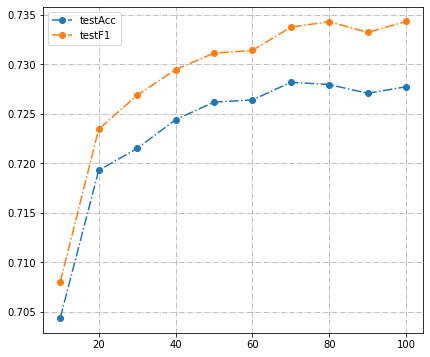

In [33]:
#三级标签
Y = data['三级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
search = range(10,101,10)
testAcc = []
testF1 = []
for b in search:
    modelRF3 = ensemble.RandomForestClassifier(n_estimators=b,oob_score=True,random_state=123)
    modelRF3.fit(X_train,Y_train)
    Y_pre = modelRF3.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_pre))
    testF1.append(f1_score(Y_test, Y_pre, average='weighted'))
third_acc_h.append(max(testAcc))
third_f1_score_h.append(testF1[testAcc.index(max(testAcc))])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax1.grid(True, linestyle = '-.')
ax1.plot(search, testAcc, label="testAcc", marker='o', linestyle = '-.')
ax1.plot(search, testF1, label="testF1", marker='o', linestyle = '-.')
ax1.legend()

## 模型6：采用tf-idf/不对原数据的失衡比例做处理/随机划分训练集与测试集/支持向量机分别对三类标签拟合

In [34]:
#一级标签
Y = data['一级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelSVC1 = svm.SVC(kernel='rbf', random_state = 123)
modelSVC1.fit(X_train,Y_train)
Y_pre = modelSVC1.predict(X_test)
print(classification_report(Y_test, Y_pre))
first_acc_h.append(accuracy_score(Y_test, Y_pre))
first_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87       133
           1       0.92      0.90      0.91       464
           2       0.95      0.83      0.89       196
           3       0.65      0.98      0.78      1364
           4       0.93      0.81      0.87       219
           5       0.98      0.82      0.89       338
           6       0.92      0.79      0.85       449
           7       0.93      0.59      0.73       118
           8       0.97      0.72      0.83       161
           9       0.94      0.79      0.86       381
          10       0.97      0.39      0.56        77
          11       0.95      0.37      0.53       217
          12       0.80      0.58      0.67        57
          13       1.00      0.74      0.85        35
          14       0.85      0.43      0.57        54
          15       1.00      0.43      0.60        44
          16       0.00      0.00      0.00        10
          17       0.99    

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
#二级标签
Y = data['二级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB2=GaussianNB()
modelNB2.fit(X_train,Y_train)
Y_pre = modelNB2.predict(X_test)
print(classification_report(Y_test, Y_pre))
second_acc_h.append(accuracy_score(Y_test, Y_pre))
second_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        55
           1       0.74      0.81      0.78        79
           2       0.97      0.79      0.87       184
           3       0.90      0.92      0.91        51
           4       0.81      0.71      0.76       125
           5       0.80      0.68      0.73       133
           6       0.76      0.80      0.78        66
           7       0.82      0.80      0.81       106
           8       0.81      0.94      0.87        51
           9       0.86      0.83      0.84       218
          10       0.86      0.88      0.87        56
          11       0.68      0.82      0.74        51
          12       0.94      0.81      0.87        58
          13       0.55      0.51      0.53        61
          14       0.81      0.78      0.79       176
          15       0.80      0.82      0.81       111
          16       0.92      1.00      0.96        12
          17       0.96    

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packa

In [36]:
#三级标签
Y = data['三级分类_整数']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 123)
modelNB3=GaussianNB()
modelNB3.fit(X_train,Y_train)
Y_pre = modelNB3.predict(X_test)
print(classification_report(Y_test, Y_pre))
third_acc_h.append(accuracy_score(Y_test, Y_pre))
third_f1_score_h.append(f1_score(Y_test, Y_pre, average='weighted'))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        55
           1       0.71      0.74      0.73        74
           2       0.25      0.58      0.35        24
           3       0.88      0.65      0.75        23
           4       0.91      0.60      0.72       160
           5       0.67      0.70      0.69        84
           6       0.81      0.68      0.74       133
           7       0.68      0.61      0.64        31
           8       0.30      0.33      0.31        24
           9       0.83      0.80      0.82       106
          10       0.90      0.88      0.89        32
          11       0.78      0.72      0.75       126
          12       0.76      0.74      0.75        34
          13       0.69      0.82      0.75        51
          14       0.50      0.50      0.50         4
          15       0.55      0.63      0.59        35
          16       0.83      0.78      0.80       176
          17       0.82    

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.7/site-packa

## 模型7：采用word2vec/不对原数据的失衡比例做处理/随机划分训练集与测试集/支持向量机分别对三类标签拟合

In [1]:
color = plt.cm.tab20c(np.linspace(0, 0.36, 6))

Acc = [first_acc_h, second_acc_h, third_acc_h]
ysr=['First Label', 'Second Label', 'Third Label']
x1 = [1,8,15] # x轴点效率位置
x2 = [i + 1 for i in x1]    # x轴线效率位置
x3 = [i + 2 for i in x1]    # x轴面效率位置
x4 = [i + 3 for i in x1]    # x轴面效率位置
x5 = [i + 4 for i in x1]    # x轴面效率位置
x6 = [i + 5 for i in x1]    # x轴面效率位置
y1 = [i[0] for i in Acc] # y轴点效率位置
y2 = [i[1] for i in Acc] # y轴线效率位置
y3 = [i[2] for i in Acc] # y轴面效率位置
y4 = [i[3] for i in Acc] # y轴面效率位置
y5 = [i[4] for i in Acc] # y轴面效率位置
y6 = [i[5] for i in Acc] # y轴面效率位置
ax1 = plt.subplot(1,1,1)
plt.sca(ax1)
plt.xlabel("") #X轴标签
plt.ylabel("T est Accuracy")  #Y轴标签
plt.bar(x1, y1, alpha=0.7, width=1, label="Bag Vector + Naive Bayes", color = color[0])
plt.bar(x2, y2, alpha=0.7, width=1, label="Bag Vector + Random Forest", color = color[1])
plt.bar(x3, y3, alpha=0.7, width=1, label="Bag Vector + SVM", color = color[2])
plt.bar(x4, y4, alpha=0.7, width=1, label="Tf-idf + Naive Bayes", color = color[3])
plt.bar(x5, y5, alpha=0.7, width=1, label="Tf-idf + Random Forest", color = color[4])
plt.bar(x6, y6, alpha=0.7, width=1, label="Tf-idf + SVM", color = color[5])
ax1.set_xticks(x3)
ax1.set_xticklabels(ysr)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width* 0.8 , box.height])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=1)

NameError: name 'plt' is not defined

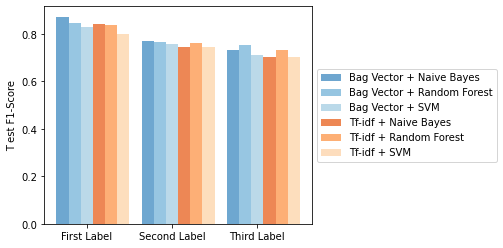

In [109]:
F1 = [first_f1_score_h, second_f1_score_h, third_f1_score_h]
ysr=['First Label', 'Second Label', 'Third Label']
x1 = [1,8,15] # x轴点效率位置
x2 = [i + 1 for i in x1]    # x轴线效率位置
x3 = [i + 2 for i in x1]    # x轴面效率位置
x4 = [i + 3 for i in x1]    # x轴面效率位置
x5 = [i + 4 for i in x1]    # x轴面效率位置
x6 = [i + 5 for i in x1]    # x轴面效率位置
y1 = [i[0] for i in F1] # y轴点效率位置
y2 = [i[1] for i in F1] # y轴线效率位置
y3 = [i[2] for i in F1] # y轴面效率位置
y4 = [i[3] for i in F1] # y轴面效率位置
y5 = [i[4] for i in F1] # y轴面效率位置
y6 = [i[5] for i in F1] # y轴面效率位置
y0 = ["","",""]
ax1 = plt.subplot(1,1,1)
plt.sca(ax1)
plt.xlabel("") #X轴标签
plt.ylabel("T est F1-Score")  #Y轴标签
plt.bar(x1, y1, alpha=0.7, width=1, label="Bag Vector + Naive Bayes", color = color[0])
plt.bar(x2, y2, alpha=0.7, width=1, label="Bag Vector + Random Forest", color = color[1])
plt.bar(x3, y3, alpha=0.7, width=1, label="Bag Vector + SVM", color = color[2])
plt.bar(x4, y4, alpha=0.7, width=1, label="Tf-idf + Naive Bayes", color = color[3])
plt.bar(x5, y5, alpha=0.7, width=1, label="Tf-idf + Random Forest", color = color[4])
plt.bar(x6, y6, alpha=0.7, width=1, label="Tf-idf + SVM", color = color[5])
ax1.set_xticks(x3)
ax1.set_xticklabels(ysr)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width* 0.8 , box.height])
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=1)

In [112]:
Acc

[[0.8684327693677649,
  0.8397150489759573,
  0.8379341050756901,
  0.8343722172751559,
  0.8299198575244879,
  0.8065449688334817],
 [0.7640249332146037,
  0.7595725734639359,
  0.7611308993766697,
  0.7377560106856634,
  0.7524487978628673,
  0.7377560106856634],
 [0.7272929652715939,
  0.7361976847729297,
  0.7099287622439893,
  0.6930097951914514,
  0.7281834372217275,
  0.6930097951914514]]

In [111]:
F1

[[0.8721646270645552,
  0.8454380830684984,
  0.8308035556798741,
  0.8427847087818908,
  0.8361367786545584,
  0.800560150956417],
 [0.769528754611683,
  0.7672068184702937,
  0.756352812452187,
  0.7456473586120339,
  0.759825550646379,
  0.7456473586120339],
 [0.733008775633781,
  0.7513925872900818,
  0.7102989560671727,
  0.7029327262848254,
  0.7337654353340679,
  0.7029327262848254]]